In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Load the dataset
data = pd.read_csv('ToyotaCorolla.csv', encoding='latin-1') 

In [4]:
# Select only the relevant columns
data = data[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

In [5]:
# Split the data into features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 1: Multicollinearity Analysis (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Multicollinearity (VIF):")
print(vif)


Multicollinearity (VIF):
        Features         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


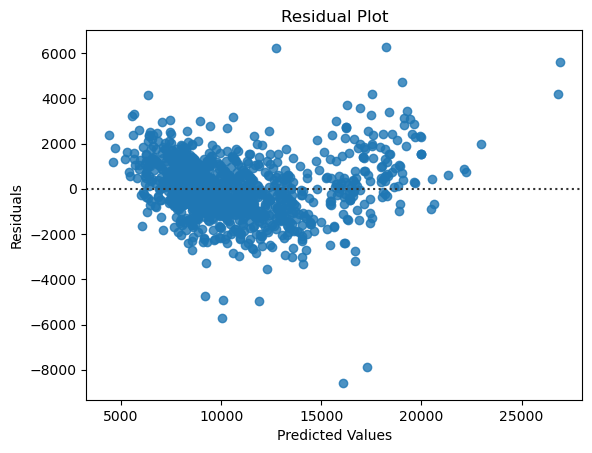

In [8]:
# Step 2: Residual Analysis
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()
residuals = model.resid

# Residual plot
sns.residplot(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

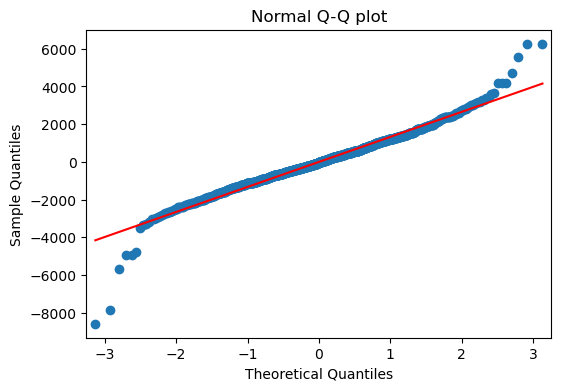

In [9]:
# Q-Q plot for normality
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Normal Q-Q plot")
plt.show()


In [11]:
# Step 3: Cook's Distance and Leverage Cutoff
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance
cook_threshold = 4 / len(X_train)

# Identify influential data points
influential_points = np.where(cook_distance > cook_threshold)[0]

# Calculate leverage values
leverage = influence.hat_matrix_diag

# Set a threshold for leverage values (commonly 2 * (p + 1) / n)
leverage_threshold = 2 * (X_train.shape[1] + 1) / len(X_train)

# Identify data points with high leverage
high_leverage_points = np.where(leverage > leverage_threshold)[0]

# Combine influential and high-leverage points
outliers = np.union1d(influential_points, high_leverage_points)

# Remove influential and high-leverage data points
X_train_cleaned = X_train.drop(index=outliers)
y_train_cleaned = y_train.drop(index=outliers)

KeyError: '[163, 196, 221, 233, 270, 303, 342, 350, 380, 413, 453, 549, 620, 669, 680, 700, 767, 777, 824, 845, 858, 893, 900, 903, 909, 940, 1042, 1075, 1119] not found in axis'

In [15]:
# Step 3: Cook's Distance and Leverage Cutoff
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance
cook_threshold = 4 / len(X_train)

# Identify influential data points
influential_points = np.where(cook_distance > cook_threshold)[0]

# Calculate leverage values
leverage = influence.hat_matrix_diag

# Set a threshold for leverage values (commonly 2 * (p + 1) / n)
leverage_threshold = 2 * (X_train.shape[1] + 1) / len(X_train)

# Identify data points with high leverage
high_leverage_points = np.where(leverage > leverage_threshold)[0]

# Combine influential and high-leverage points
outliers = np.union1d(influential_points, high_leverage_points)

# Remove influential and high-leverage data points
X_train_cleaned = X_train.reindex(X_train.index.difference(outliers))
y_train_cleaned = y_train.reindex(X_train.index.difference(outliers))


In [16]:
# Step 4: Build the Final Model
X_train_cleaned_with_const = sm.add_constant(X_train_cleaned)
final_model = sm.OLS(y_train_cleaned, X_train_cleaned_with_const).fit()

# Step 5: Calculate R-squared for the Final Model
X_test_with_const = sm.add_constant(X_test)
y_pred = final_model.predict(X_test_with_const)
final_r2 = r2_score(y_test, y_pred)

print("R-squared for the final model:", final_r2)

R-squared for the final model: 0.8547537850028541


In [17]:
##### 2) Random Forest Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('ToyotaCorolla.csv', encoding='latin-1')

# Select features
selected_features = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
X = data[selected_features]
y = data["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 813.9660416666668
Mean Squared Error: 1102041.4610097222
R-squared: 0.9174054634365347


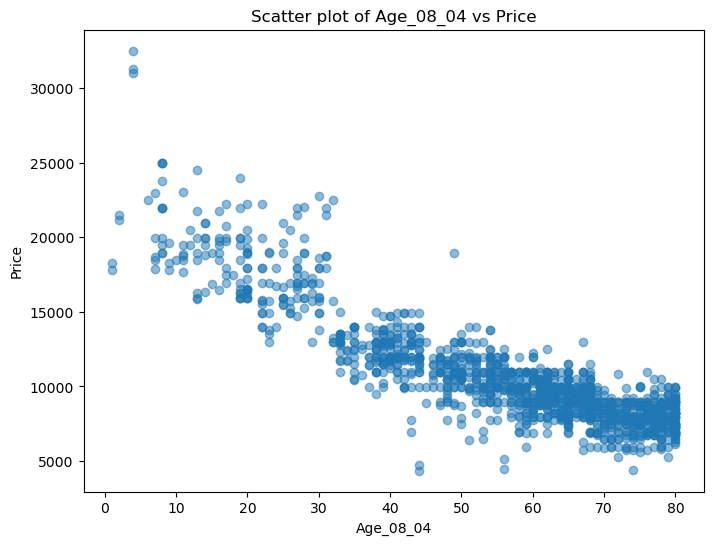

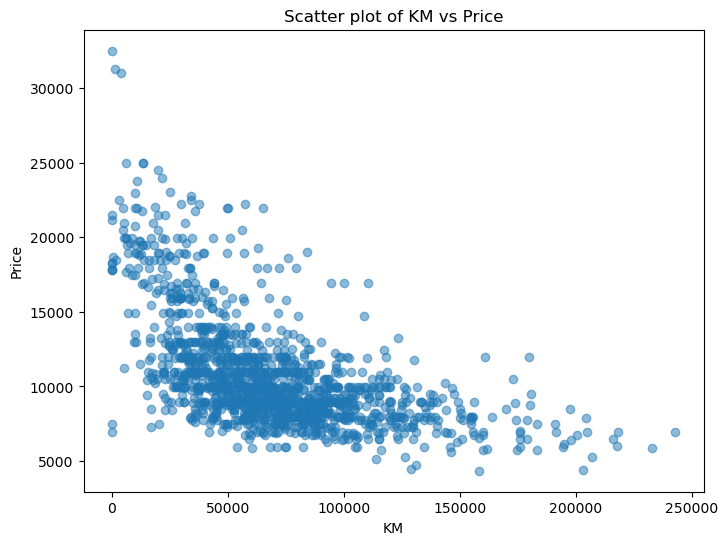

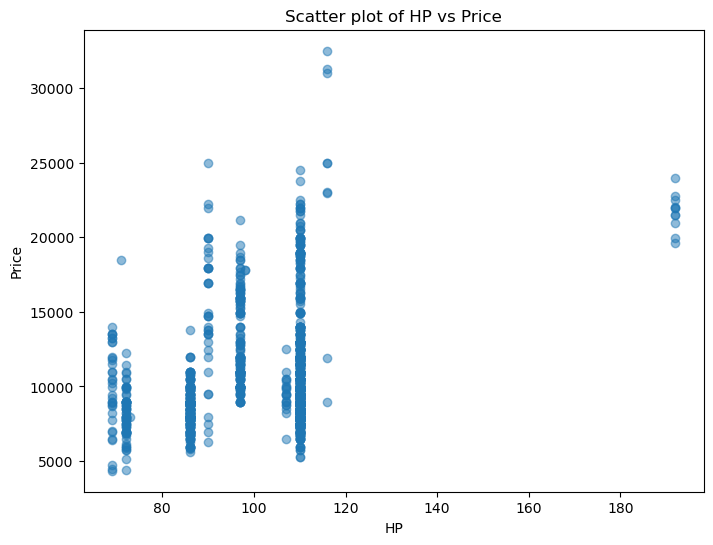

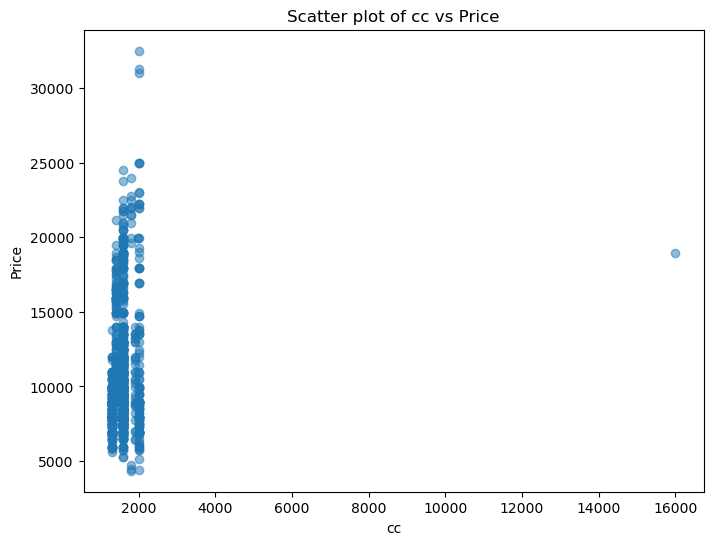

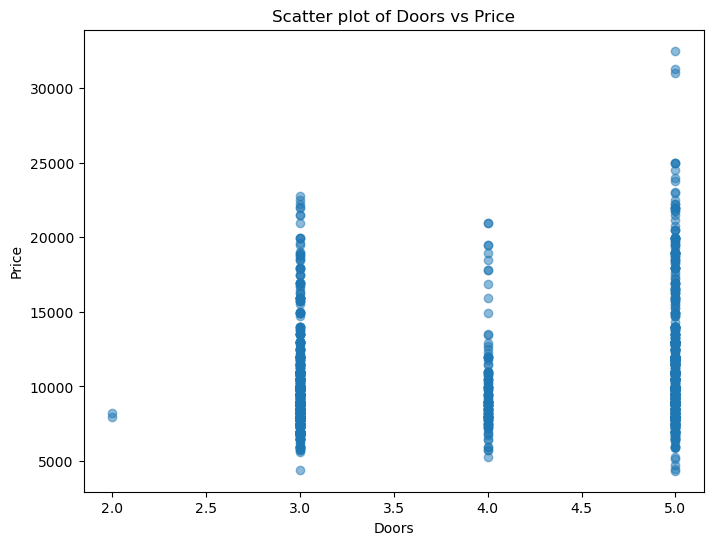

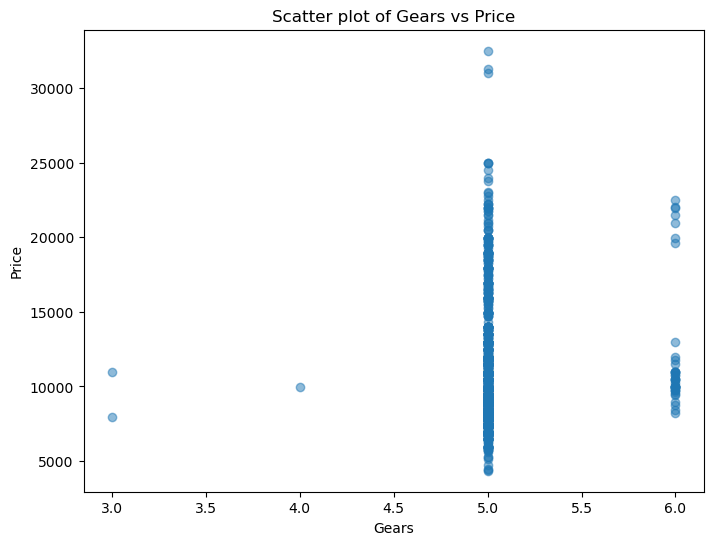

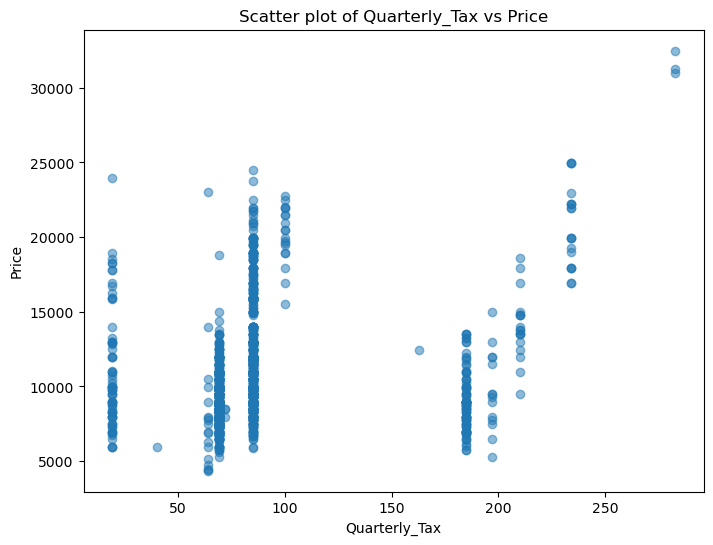

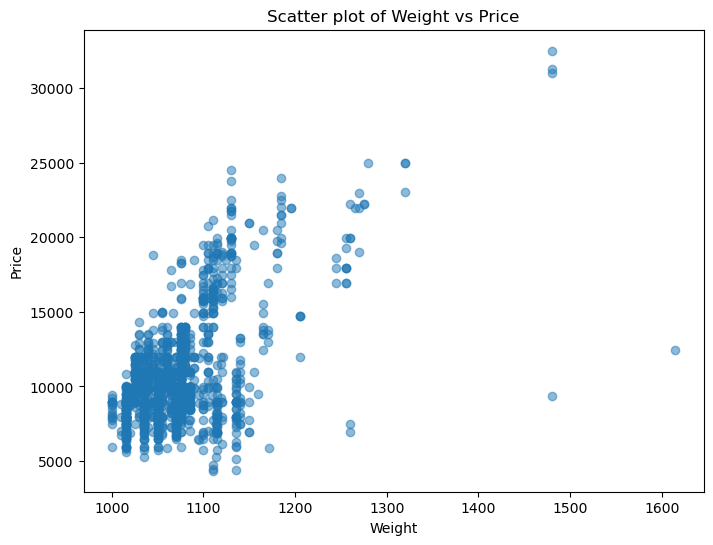

In [18]:

########### data visualization

import matplotlib.pyplot as plt

# Scatter plots for numerical features against Price
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data["Price"], alpha=0.5)
    plt.title(f"Scatter plot of {feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()



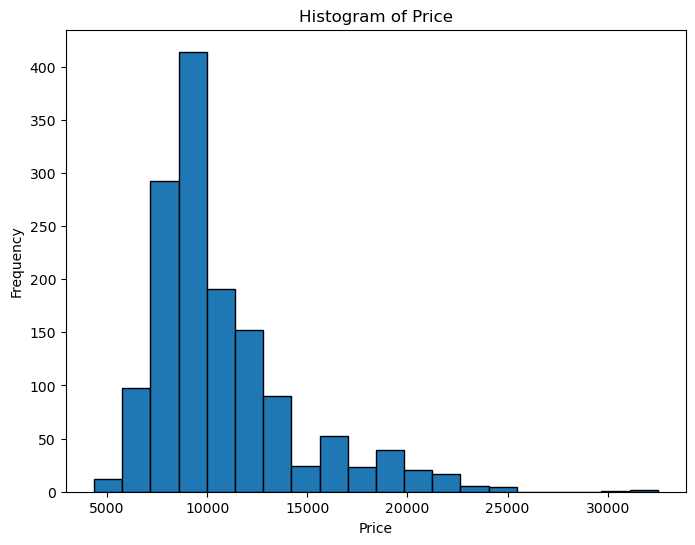

In [19]:



# Histogram for Price
plt.figure(figsize=(8, 6))
plt.hist(data["Price"], bins=20, edgecolor="k")
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
